In [1]:
from spreg import OLS
import pysal as ps
import libpysal
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

/home/maciek/.pyenv/versions/3.8.12/envs/school-map-project/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [4]:
regression_df = gpd.read_file('../raw_data/for_models/regression_gdf.shp')
clustering_df = gpd.read_file('../raw_data/for_models/cluster_gdf.shp')

In [19]:
regression_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   PLR_ID      536 non-null    int64   
 1   public_tra  536 non-null    float64 
 2   eating      536 non-null    float64 
 3   culture     536 non-null    float64 
 4   community   536 non-null    float64 
 5   health_car  536 non-null    float64 
 6   public_ser  536 non-null    float64 
 7   education   536 non-null    float64 
 8   schools     536 non-null    float64 
 9   universiti  536 non-null    float64 
 10  kindergart  536 non-null    float64 
 11  outdoor_fa  536 non-null    float64 
 12  outdoor_le  536 non-null    float64 
 13  night_life  536 non-null    float64 
 14  water       536 non-null    float64 
 15  mig_rate    536 non-null    float64 
 16  HK_EU15     536 non-null    float64 
 17  HK_EU28     536 non-null    float64 
 18  HK_Polen    536 non-null    float64 
 19  

In [20]:
regression_df.noise

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
531    1.0
532    0.0
533    0.0
534    2.0
535    3.0
Name: noise, Length: 536, dtype: float64

In [22]:
y_perm = regression_df['child_pov']
X_perm = regression_df.drop(columns=['PLR_ID','BZR_NAME','child_pov', 'HK_NZOrd','geometry'])

### Perform permutation
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
#fit model
model = LinearRegression().fit(X_perm,y_perm)
#Perform permutation
permutation_score = permutation_importance(model, X_perm,y_perm, n_repeats=100)
#Unstack results, put in df
importance_df = pd.DataFrame(np.vstack((X_perm.columns,permutation_score.importances_mean)).T)
importance_df.columns=['feature','feature importance']
#Order by importance
importance_df.sort_values(by='feature importance', ascending = False, inplace=True)
importance_df
#remove feature that have lower feature importance, run the validation score to test the reduced feature

,feature,feature importance
14,mig_rate,0.337381
15,HK_EU15,0.3102
23,HK_NZOrd,0.116744
12,night_life,0.107593
1,eating,0.10543
30,dyn_unempl,0.086523
16,HK_EU28,0.070417
21,HK_Arab,0.048733
20,HK_Turk,0.039742
35,vegpm20,0.028755


In [183]:
clustering_df.columns

Index(['PLR_ID', 'public_tra', 'eating', 'culture', 'community', 'health_car',
       'public_ser', 'education', 'universiti', 'outdoor_fa', 'outdoor_le',
       'night_life', 'water', 'E_EU1', 'E_E1U6', 'E_E6U15', 'E_E15U18',
       'E_E18U25', 'E_E25U55', 'E_E55U65', 'E_E65U80', 'E_E80U110', 'mig_rate',
       'HK_EU15', 'HK_EU28', 'HK_Polen', 'HK_EheJug', 'HK_EheSU', 'HK_Turk',
       'HK_Arab', 'HK_Sonst', 'HK_NZOrd', 'ave_rent', 'dyn_wel_po', 'welf_po',
       'social_hou', 'public_hou', 'dyn_ew', 'five_y_pls', 'rent_to_pr',
       'dyn_r_to_p', 'sales', 'dyn_sales', 'BZR_NAME', 'unemployme', 'welfare',
       'child_pov', 'dyn_unempl', 'dyn_welfar', 'dyn_child', 'noise', 'air',
       'green', 'bio', 'total_buil', 'B_1940', 'B_1941_199', 'B_1991_201',
       'B_age', 'vegpm20', 'ch_rate', 'other_sch', 'vocat_sch', 'primary_sc',
       'Gymnasium', 'secon_sch', 'priv_schoo', 'sp_nee_sch', 'kita',
       'stations', 'geometry', 'label'],
      dtype='object')

In [27]:
regression_df.columns

Index(['PLR_ID', 'public_tra', 'eating', 'culture', 'community', 'health_car',
       'public_ser', 'education', 'schools', 'universiti', 'kindergart',
       'outdoor_fa', 'outdoor_le', 'night_life', 'water', 'mig_rate',
       'HK_EU15', 'HK_EU28', 'HK_Polen', 'HK_EheJug', 'HK_EheSU', 'HK_Turk',
       'HK_Arab', 'HK_Sonst', 'HK_NZOrd', 'ave_rent', 'social_hou',
       'public_hou', 'dyn_ew', 'five_y_pls', 'dyn_sales', 'BZR_NAME',
       'child_pov', 'dyn_unempl', 'noise', 'air', 'green', 'bio', 'vegpm20',
       'vegpm10', 'change', 'ch_rate', 'other_sch', 'vocat_sch', 'primary_sc',
       'Gymnasium', 'secon_sch', 'priv_schoo', 'sp_nee_sch', 'kita',
       'stations', 'geometry'],
      dtype='object')

In [35]:
from sklearn.feature_selection import mutual_info_regression as MIR

In [83]:
features_clust = [
    'mig_rate', 'public_tra', 'eating', 'culture', 'community', 'health_car', 'public_ser',
    'education', 'universiti', 'outdoor_fa', 'outdoor_le', 'night_life',
    'water', 'ave_rent', 'social_hou', 'dyn_ew', 'dyn_r_to_p', 'dyn_sales',
    'dyn_unempl', 'dyn_welfar', 'noise', 'air', 'green', 'bio',
    'other_sch', 'vocat_sch', 'primary_sc', 'Gymnasium', 'secon_sch',
    'priv_schoo', 'sp_nee_sch', 'kita', 'stations'
]

In [84]:
mi_score_from_cluster = MIR(clustering_df[features_clust], clustering_df.child_pov)

In [198]:
pd.DataFrame(mi_score_from_cluster, index=clustering_df[features_clust].columns).sort_values(by=0, ascending=False).head(20)

,0
dyn_unempl,0.440573
mig_rate,0.404197
dyn_welfar,0.351484
dyn_sales,0.272877
dyn_ew,0.260719
social_hou,0.238327
dyn_r_to_p,0.236319
ave_rent,0.233303
night_life,0.127966
kita,0.127219


In [68]:
features_reg = ['public_tra', 'eating', 'culture', 'community', 'health_car',
       'public_ser', 'education', 'schools', 'universiti', 'kindergart',
       'outdoor_fa', 'outdoor_le', 'night_life', 'water', 'mig_rate',
       'ave_rent', 'social_hou',
       'public_hou', 'dyn_ew', 'dyn_sales',
       'dyn_unempl', 'noise', 'air', 'green', 'bio', 'vegpm20',
       'vegpm10', 'change', 'ch_rate', 'other_sch', 'vocat_sch', 'primary_sc',
       'Gymnasium', 'secon_sch', 'priv_schoo', 'sp_nee_sch', 'kita',
       'stations']

In [69]:
mi_score_from_reg = MIR(regression_df[features_reg], regression_df.child_pov)

In [79]:
f_reg_dyn_unempl = ['public_tra', 'eating', 'culture', 'community', 'health_car',
       'public_ser', 'education', 'schools', 'universiti', 'kindergart',
       'outdoor_fa', 'outdoor_le', 'night_life', 'water', 'mig_rate',
       'ave_rent', 'social_hou', 'public_hou', 'dyn_ew', 'dyn_sales', 'noise', 'air', 'green', 'bio', 'vegpm20',
       'vegpm10', 'change', 'ch_rate', 'other_sch', 'vocat_sch', 'primary_sc',
       'Gymnasium', 'secon_sch', 'priv_schoo', 'sp_nee_sch', 'kita',
       'stations']

In [70]:
pd.DataFrame(mi_score_from_reg, index=regression_df[features_reg].columns).sort_values(by=0, ascending=False)

,0
dyn_unempl,0.443211
mig_rate,0.404636
dyn_sales,0.272819
dyn_ew,0.259935
social_hou,0.237779
ave_rent,0.231875
public_hou,0.225907
night_life,0.131326
kita,0.114555
air,0.099773


In [81]:
pd.DataFrame(MIR(regression_df[f_reg_dyn_unempl], regression_df.dyn_unempl), index=regression_df[f_reg_dyn_unempl].columns).sort_values(by=0, ascending=False)

,0
mig_rate,0.226118
social_hou,0.149123
dyn_ew,0.139803
dyn_sales,0.123415
ave_rent,0.111991
stations,0.091486
public_hou,0.081002
night_life,0.076056
bio,0.072348
primary_sc,0.072323


In [145]:
from sklearn.preprocessing import robust_scale
clustering_df.child_pov = robust_scale(clustering_df.child_pov)

In [199]:
clustering_df.columns

Index(['PLR_ID', 'public_tra', 'eating', 'culture', 'community', 'health_car',
       'public_ser', 'education', 'universiti', 'outdoor_fa', 'outdoor_le',
       'night_life', 'water', 'E_EU1', 'E_E1U6', 'E_E6U15', 'E_E15U18',
       'E_E18U25', 'E_E25U55', 'E_E55U65', 'E_E65U80', 'E_E80U110', 'mig_rate',
       'HK_EU15', 'HK_EU28', 'HK_Polen', 'HK_EheJug', 'HK_EheSU', 'HK_Turk',
       'HK_Arab', 'HK_Sonst', 'HK_NZOrd', 'ave_rent', 'dyn_wel_po', 'welf_po',
       'social_hou', 'public_hou', 'dyn_ew', 'five_y_pls', 'rent_to_pr',
       'dyn_r_to_p', 'sales', 'dyn_sales', 'BZR_NAME', 'unemployme', 'welfare',
       'child_pov', 'dyn_unempl', 'dyn_welfar', 'dyn_child', 'noise', 'air',
       'green', 'bio', 'total_buil', 'B_1940', 'B_1941_199', 'B_1991_201',
       'B_age', 'vegpm20', 'ch_rate', 'other_sch', 'vocat_sch', 'primary_sc',
       'Gymnasium', 'secon_sch', 'priv_schoo', 'sp_nee_sch', 'kita',
       'stations', 'geometry', 'label'],
      dtype='object')

In [217]:
new_cluster_variables = ['child_pov', 'mig_rate', 'rent_to_pr']

In [218]:
old_cluster_variables = ['mig_rate', 'dyn_unempl', 'eating', 'night_life', 'public_hou', 'ave_rent', 'education', 'dyn_sales', 'child_pov']

In [219]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(clustering_df[new_cluster_variables])

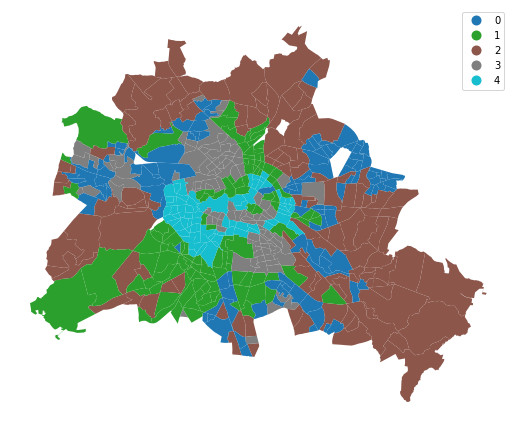

In [220]:
# Assign labels into a column
clustering_df["label"] = k5cls.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including
# a legend and with no boundary lines
clustering_df.plot(
    column="label", categorical=True, legend=True, linewidth=0, ax=ax
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [221]:
# Group table by cluster label, keep the variables used
# for clustering, and obtain their mean
k5means = clustering_df.groupby("label")[new_cluster_variables].mean()
# Transpose the table and print it rounding each value
# to three decimals
k5means.T.round(3)

label,0,1,2,3,4
child_pov,0.492,-0.285,-0.393,0.962,-0.149
mig_rate,-0.042,-0.089,-0.745,1.065,0.427
rent_to_pr,-0.374,0.369,-0.329,0.256,1.716


In [216]:
clustering_df.groupby("label").size()

label
0    133
1     98
2     57
3    111
4    137
dtype: int64